In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The data

First, let's read some data.

In [2]:
trials = pd.read_excel('results.xlsx', sheet_name='trials', index_col='id')
trials.tail()

,sample_id,weight_empty_1,vst_zero_tds,difluid_zero_tds,difluid_zero_temp,difluid_zero_n,weight_empty_2,weight_full,vst_sample_tds,difluid_sample_tds,difluid_sample_temp,difluid_sample_n,weight_dry_1,weight_dry_2,weight_dry_3,weight_dry_4,weight_dry_5,notes
id,,,,,,,,,,,,,,,,,,
71,25,1.167,0.0,0.0,19.9,1.33299,1.171,10.722,3.74,3.90,20.2,1.33989,1.530,1.528,1.528,1.537,1.539,NaN
72,25,1.149,0.0,0.0,20.2,1.33299,1.154,9.754,1.66,1.75,20.2,1.33608,1.297,1.296,1.295,1.304,1.305,NaN
73,25,1.221,0.0,0.0,20.2,1.33299,1.229,10.866,0.87,0.89,20.1,1.33458,1.310,1.307,1.306,1.316,1.318,NaN
74,25,1.206,0.0,0.0,20.2,1.33297,1.215,9.872,0.41,0.40,20.3,1.33371,1.247,1.243,1.243,1.252,1.253,NaN
75,9,1.183,NaN,NaN,NaN,NaN,1.186,1.186,NaN,NaN,NaN,NaN,1.186,1.185,1.184,1.191,1.192,NaN


In [3]:
samples = pd.read_excel('results.xlsx', sheet_name='samples', index_col='id')
samples.tail()

,tube_id,coffee,filtered,filtrate_weight
id,,,,
21,23,Rukira,no,NaN
22,16,The Doppelganger,yes,19.99
23,18,The Standard,yes,19.69
24,20,Roselis Herrera,yes,19.90
25,23,Rukira,yes,19.31


Now we merge the sample data into the trials table.

In [4]:
trials = pd.merge(trials, samples, how='right', left_on='sample_id', right_index=True)
trials.tail()

,sample_id,weight_empty_1,vst_zero_tds,difluid_zero_tds,difluid_zero_temp,difluid_zero_n,weight_empty_2,weight_full,vst_sample_tds,difluid_sample_tds,...,weight_dry_1,weight_dry_2,weight_dry_3,weight_dry_4,weight_dry_5,notes,tube_id,coffee,filtered,filtrate_weight
id,,,,,,,,,,,,,,,,,,,,,
70,25,1.166,0.0,0.0,20.1,1.33299,1.170,10.934,8.34,8.59,...,1.974,1.970,1.968,1.977,1.979,NaN,23,Rukira,yes,19.31
71,25,1.167,0.0,0.0,19.9,1.33299,1.171,10.722,3.74,3.90,...,1.530,1.528,1.528,1.537,1.539,NaN,23,Rukira,yes,19.31
72,25,1.149,0.0,0.0,20.2,1.33299,1.154,9.754,1.66,1.75,...,1.297,1.296,1.295,1.304,1.305,NaN,23,Rukira,yes,19.31
73,25,1.221,0.0,0.0,20.2,1.33299,1.229,10.866,0.87,0.89,...,1.310,1.307,1.306,1.316,1.318,NaN,23,Rukira,yes,19.31
74,25,1.206,0.0,0.0,20.2,1.33297,1.215,9.872,0.41,0.40,...,1.247,1.243,1.243,1.252,1.253,NaN,23,Rukira,yes,19.31


# Error analysis

To calculate uncertainty in TDS, we start with the expression for TDS:

$$
\begin{gathered}
\text{TDS} = \frac{m_\text{solid}}{m_\text{solution}} = \frac{m_\text{dry} - m_\text{empty}}{m_\text{full} - m_\text{empty}}
\end{gathered}
$$

Then we have:

$$
\begin{gathered}
\frac{\partial \, \text{TDS}}{\partial m_\text{dry}} = \frac{\partial}{\partial m_\text{dry}} \frac{m_\text{dry} - m_\text{empty}}{m_\text{full} - m_\text{empty}} = \frac{1}{m_\text{full} - m_\text{empty}} \\
\end{gathered}
$$

and

$$
\begin{aligned}
\frac{\partial \, \text{TDS}}{\partial m_\text{full}} &= \frac{\partial}{\partial m_\text{full}} \frac{m_\text{dry} - m_\text{empty}}{m_\text{full} - m_\text{empty}} \\
&= \left[ \frac{\partial}{\partial m_\text{full}} (m_\text{dry} - m_\text{empty}) \right] \left[ \frac{1}{m_\text{full} - m_\text{empty}} \right] + (m_\text{dry} - m_\text{empty}) \frac{\partial}{\partial m_\text{full}} \frac{1}{(m_\text{full} - m_\text{empty})} \\
&= -\frac{m_\text{dry} - m_\text{empty}}{(m_\text{full} - m_\text{empty})^2}
\end{aligned}
$$

and

$$
\begin{aligned}
\frac{\partial \, \text{TDS}}{\partial m_\text{empty}} &= \frac{\partial}{\partial m_\text{empty}} \frac{m_\text{dry} - m_\text{empty}}{m_\text{full} - m_\text{empty}} \\
&= \left[ \frac{\partial}{\partial m_\text{empty}} (m_\text{dry} - m_\text{empty}) \right] \left[ \frac{1}{m_\text{full} - m_\text{empty}} \right] + (m_\text{dry} - m_\text{empty}) \frac{\partial}{\partial m_\text{empty}} \frac{1}{(m_\text{full} - m_\text{empty})} \\
&= -\frac{1}{m_\text{full} - m_\text{empty}} + \frac{m_\text{dry} - m_\text{empty}}{(m_\text{full} - m_\text{empty})^2} \\
&= -\frac{m_\text{full} - m_\text{empty}}{(m_\text{full} - m_\text{empty})^2} + \frac{m_\text{dry} - m_\text{empty}}{(m_\text{full} - m_\text{empty})^2} \\
&= -\frac{m_\text{full} - m_\text{dry}}{(m_\text{full} - m_\text{empty})^2} \\
\end{aligned}
$$

Then:

$$
\begin{aligned}
\sigma^2_\text{TDS} &= \left( \frac{\partial \, \text{TDS}}{\partial m_\text{dry}} \sigma_m \right)^2 +  \left( \frac{\partial \, \text{TDS}}{\partial m_\text{full}} \sigma_m \right)^2 +  \left( \frac{\partial \, \text{TDS}}{\partial m_\text{empty}} \sigma_m \right)^2 \\
&= \left( \frac{1}{m_\text{full} - m_\text{empty}} \sigma_m \right)^2 +  \left( -\frac{m_\text{dry} - m_\text{empty}}{(m_\text{full} - m_\text{empty})^2} \sigma_m \right)^2 +  \left( -\frac{m_\text{full} - m_\text{dry}}{(m_\text{full} - m_\text{empty})^2} \sigma_m \right)^2 \\
&= \left[ 1 +  \left( \frac{m_\text{dry} - m_\text{empty}}{m_\text{full} - m_\text{empty}} \right)^2 +  \left( \frac{m_\text{full} - m_\text{dry}}{m_\text{full} - m_\text{empty}} \right)^2 \right] \left( \frac{\sigma_m}{m_\text{full} - m_\text{empty}} \right)^2 \\
&= \left[ 1 +  \left( \frac{m_\text{solid}}{m_\text{solution}} \right)^2 +  \left(1 - \frac{m_\text{solid}}{m_\text{solution}} \right)^2 \right] \left( \frac{\sigma_m}{m_\text{solution}} \right)^2
\end{aligned}
$$

In code:

In [5]:
sigma_m = 0.002    # Uncertainty in weight measurements
sigma_tds_n = 0.03 # Uncertainty in TDS due to errors in refractive index

trials['weight_solid'] = trials.weight_dry_3 - trials.weight_empty_2
trials['weight_solution'] = trials.weight_full - trials.weight_empty_2
trials['oven_tds'] = trials.weight_solid / trials.weight_solution * 100
trials['oven_tds_sigma'] = np.sqrt((1 + (trials.weight_solid / trials.weight_solution)**2 + (1 - trials.weight_solid / trials.weight_solution)**2)) * (sigma_m / trials.weight_solution) * 100

trials.tail()

,sample_id,weight_empty_1,vst_zero_tds,difluid_zero_tds,difluid_zero_temp,difluid_zero_n,weight_empty_2,weight_full,vst_sample_tds,difluid_sample_tds,...,weight_dry_5,notes,tube_id,coffee,filtered,filtrate_weight,weight_solid,weight_solution,oven_tds,oven_tds_sigma
id,,,,,,,,,,,,,,,,,,,,,
70,25,1.166,0.0,0.0,20.1,1.33299,1.170,10.934,8.34,8.59,...,1.979,NaN,23,Rukira,yes,19.31,0.798,9.764,8.172880,0.027860
71,25,1.167,0.0,0.0,19.9,1.33299,1.171,10.722,3.74,3.90,...,1.539,NaN,23,Rukira,yes,19.31,0.357,9.551,3.737828,0.029076
72,25,1.149,0.0,0.0,20.2,1.33299,1.154,9.754,1.66,1.75,...,1.305,NaN,23,Rukira,yes,19.31,0.141,8.600,1.639535,0.032622
73,25,1.221,0.0,0.0,20.2,1.33299,1.229,10.866,0.87,0.89,...,1.318,NaN,23,Rukira,yes,19.31,0.077,9.637,0.799004,0.029233
74,25,1.206,0.0,0.0,20.2,1.33297,1.215,9.872,0.41,0.40,...,1.253,NaN,23,Rukira,yes,19.31,0.028,8.657,0.323438,0.032619


# Refractometer TDS vs. refractive index

Let's plot DiFluid TDS vs. refractive index.

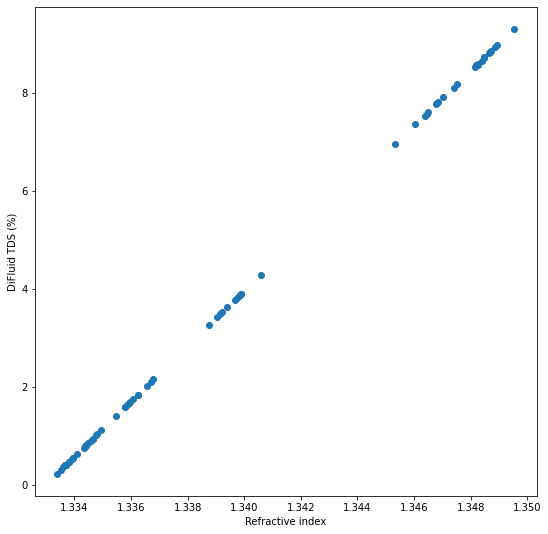

In [6]:
# Drop rows with NaN
df = trials.dropna(subset=['difluid_sample_n', 'difluid_sample_tds'])

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the raw data
ax.scatter(df.difluid_sample_n, df.difluid_sample_tds)

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('DiFluid TDS (%)')

# Get axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

We can fit a quadratic curve to this plot to get an estimate of the relationship used by the refractometer.

In [7]:
difluid_fit = np.polyfit(df.difluid_sample_n-1.3330, df.difluid_sample_tds, 2)
difluid_fit

array([-2.80238933e+02,  5.66712392e+02,  5.88041148e-03])

No we can plot with the quadratic fit.

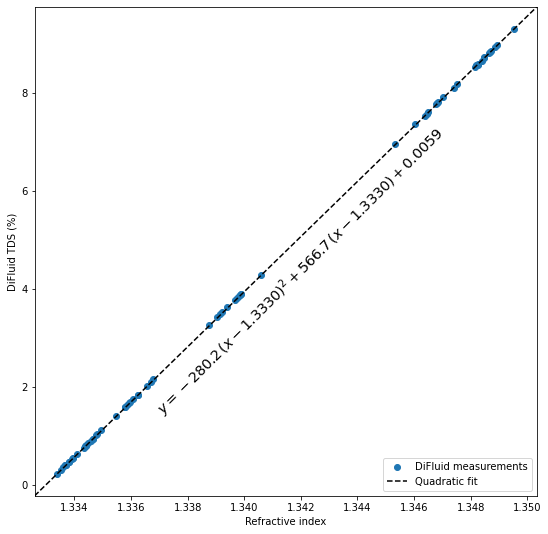

In [8]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the raw data
ax.scatter(df.difluid_sample_n, df.difluid_sample_tds, label='DiFluid measurements')

# Plot the fit
xs = np.array([xlim[0], xlim[1]])
ys = difluid_fit[0] * (xs-1.3330)**2 + difluid_fit[1] * (xs-1.3330) + difluid_fit[2]
ax.plot(xs, ys, c='k', ls='--', label='Quadratic fit')

# Plot the equation
s = '$y={:.1f}\,(x-1.3330)^2+{:.1f}\,(x-1.3330)+{:.4f}$'.format(*difluid_fit)
s = s.replace('+-', '-')
ax.text(xs.mean()+.00025, ys.mean()-0.25, s, horizontalalignment='center', verticalalignment='top', fontsize='x-large', rotation=45, rotation_mode='anchor')

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('DiFluid TDS (%)')

# Set axis ranges
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Draw legend
ax.legend(loc='lower right')

Then we can subtract this from the original data to get a plot of the residual TDS.

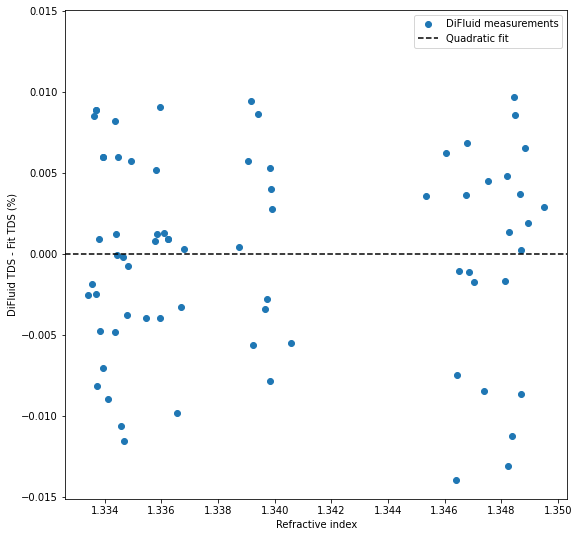

In [9]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the raw data
fit_xs = df.difluid_sample_n
fit_ys = difluid_fit[0] * (fit_xs-1.3330)**2 + difluid_fit[1] * (fit_xs-1.3330) + difluid_fit[2]
ax.scatter(fit_xs, df.difluid_sample_tds - fit_ys, label='DiFluid measurements')

# Plot the fit
xs = np.array([xlim[0], xlim[1]])
ys = np.array([0, 0])
ax.plot(xs, ys, c='k', ls='--', label='Quadratic fit')

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('DiFluid TDS - Fit TDS (%)')

# Set x-axis range
ax.set_xlim(xlim)

# Max y-axis symmetrical
ylim_abs = max([abs(y) for y in ax.get_ylim()])
ax.set_ylim((-ylim_abs, ylim_abs))

# Draw legend
ax.legend()

This looks like a good fit, as the residual is smaller than our expected measurement accuracy.

# Oven dried TDS vs. refractive index

Now, let's look at oven dried total solids (TS) vs. refractive index.

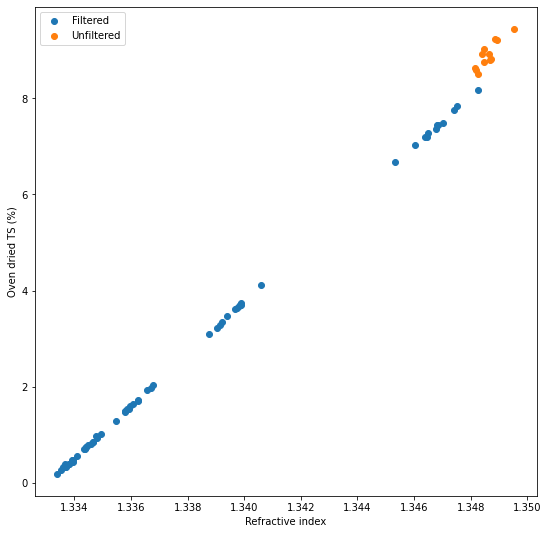

In [10]:
# Split samples
filt = trials[trials.filtered == 'yes'].copy()
unfilt = trials[trials.filtered != 'yes'].copy()

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the data
ax.scatter(filt.difluid_sample_n, filt.oven_tds, label='Filtered')
ax.scatter(unfilt.difluid_sample_n, unfilt.oven_tds, label='Unfiltered')

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('Oven dried TS (%)')

# Draw legend
ax.legend()

The data is quite linear, with the exception of the unfiltered samples on the right. For now, let's look at just the filtered samples.

((1.332657, 1.349003), (-0.2066295121684784, 8.571904228150121))

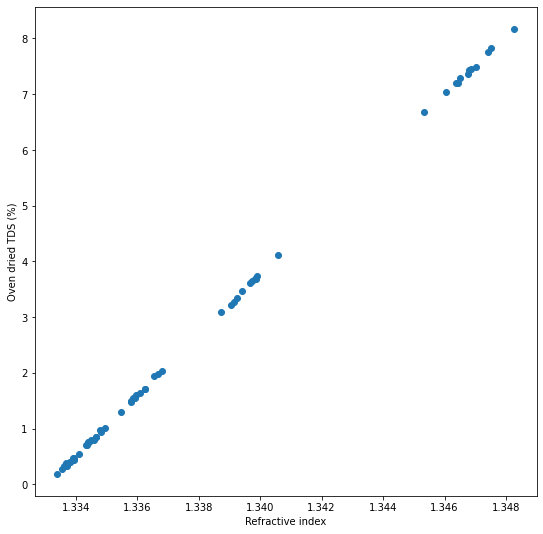

In [11]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the data
ax.scatter(filt.difluid_sample_n, filt.oven_tds)

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('Oven dried TDS (%)')

# Get plot limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Display plot limits
xlim, ylim

Let's fit a quadratic to the data.

In [12]:
fit = np.polyfit(filt.difluid_sample_n-1.3330, filt.oven_tds, 2)
fit

array([-6.62021934e+02,  5.49534819e+02, -3.95601439e-02])

And then plot the fit.

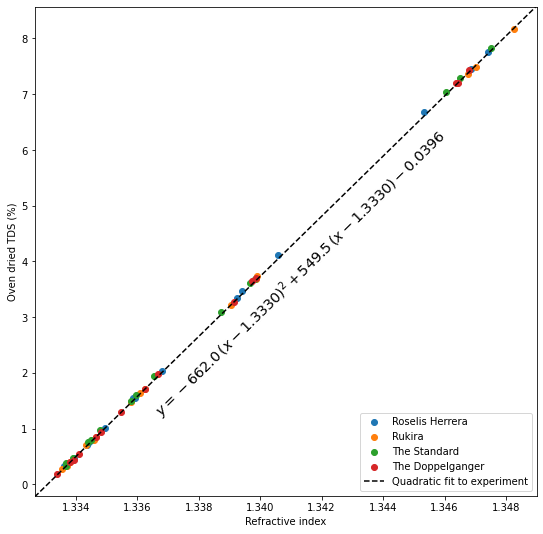

In [13]:
# Calculate fit TDS for each sample
xs = filt.difluid_sample_n
ys = fit[0] * (xs-1.3330)**2 + fit[1] * (xs-1.3330) + fit[2]
filt['res_tds'] = filt.oven_tds - ys

# Get default colours
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Get list of coffees
coffees = ['Roselis Herrera', 'Rukira', 'The Standard', 'The Doppelganger']

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# For each coffee
for i, coffee in enumerate(coffees):

    # Get data for this coffee
    df = filt[filt.coffee == coffee]

    # Plot the data
    xs = df.difluid_sample_n
    ys = df.oven_tds
    ax.scatter(xs, ys, c=colors[i], label=coffee)

# Plot the fit
xs_fit = np.array([xlim[0], xlim[1]])
ys_fit = fit[0] * (xs_fit-1.3330)**2 + fit[1] * (xs_fit-1.3330) + fit[2]
ax.plot(xs_fit, ys_fit, color='k', ls='--', label='Quadratic fit to experiment')

# Plot the equation
s = '$y={:.1f}\,(x-1.3330)^2+{:.1f}\,(x-1.3330)+{:.4f}$'.format(*fit)
s = s.replace('+-', '-')
ax.text(xs_fit.mean()+.00025, ys_fit.mean()-0.25, s, horizontalalignment='center', verticalalignment='top', fontsize='x-large', rotation=44.5, rotation_mode='anchor')

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('Oven dried TDS (%)')

# Set x-axis range
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Draw legend
ax.legend(loc='lower right')

As a check, let's see what TDS value this predicts for distilled water.

In [14]:
xs = 1.3330
ys = fit[0] * xs**2 + fit[1] * xs + fit[2]
ys

-443.84913730442537

As expected, this is quite close to zero.

Now we can subtract the fit from our data and plot.

(1.332657, 1.349003)

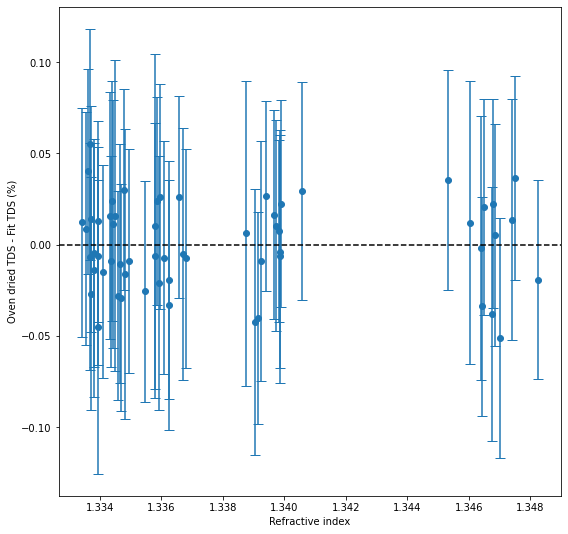

In [15]:
# Calculate fit TDS for each sample
xs = filt.difluid_sample_n
ys = fit[0] * (xs-1.3330)**2 + fit[1] * (xs-1.3330) + fit[2]
filt['res_tds'] = filt.oven_tds - ys

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the data
xs = filt.difluid_sample_n
ys = filt.res_tds
ax.scatter(xs, ys)

# Plot error bars
ax.errorbar(xs, ys, yerr=filt.oven_tds_sigma * 1.960, capsize=5, ls='none')

# Plot the fit
xs_fit = np.array([xlim[0], xlim[1]])
ys_fit = np.array([0, 0])
ax.plot(xs_fit, ys_fit, color='k', ls='--')

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('Oven dried TDS - Fit TDS (%)')

# Set x-axis range
ax.set_xlim(xlim)

As expected, this is quite close to zero.

We can also compare the oven dried results with the DiFluid's internal conversion from refractive index to TDS, and also with the results from Illy.

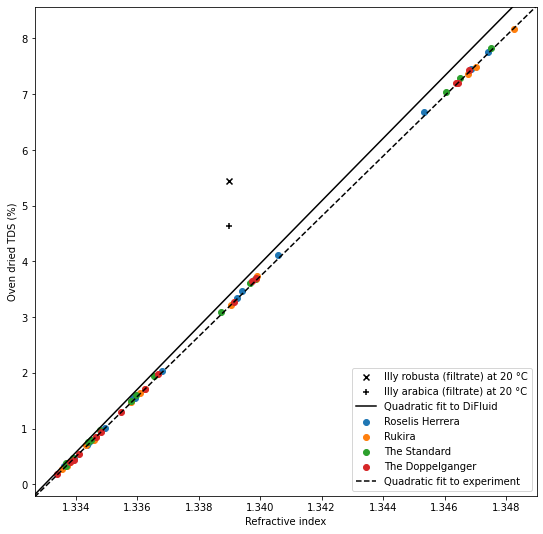

In [16]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Add Illy datapoints
robusta_n = 1.339
arabica_n = 1.339

# Assuming filtrate has same density as original solution
robusta_tds = 0.0556 / 1.0219 * 100
arabica_tds = 0.0473 / 1.0198 * 100

ax.scatter(robusta_n, robusta_tds, label='Illy robusta (filtrate) at 20 °C', marker='x', color='k')
ax.scatter(arabica_n, arabica_tds, label='Illy arabica (filtrate) at 20 °C', marker='+', color='k')

# Plot DiFluid curve
def DiFluidTDS(tds):
    fitfunc = lambda x, a, b, c: a * (x-1.3330)**2 + b * (x-1.3330) + c
    return fitfunc(tds, difluid_fit[0], difluid_fit[1], difluid_fit[2])

xs = np.linspace(xlim[0], xlim[1])
ys = DiFluidTDS(xs)
ax.plot(xs, ys, color='k', label='Quadratic fit to DiFluid')

# For each coffee
for i, coffee in enumerate(coffees):

    # Get data for this coffee
    df = filt[filt.coffee == coffee]

    # Plot the data
    xs = df.difluid_sample_n
    ys = df.oven_tds
    ax.scatter(xs, ys, c=colors[i], label=coffee)

# Plot the fit
xs_fit = np.array([xlim[0], xlim[1]])
ys_fit = fit[0] * (xs_fit-1.3330)**2 + fit[1] * (xs_fit-1.3330) + fit[2]
ax.plot(xs_fit, ys_fit, color='k', ls='--', label='Quadratic fit to experiment')

# Set axis labels
ax.set_xlabel('Refractive index')
ax.set_ylabel('Oven dried TDS (%)')

# Set x-axis range
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Draw legend
ax.legend(loc='lower right')

# Difference between coffees

Let's plot the residual TDS separately for each coffee.

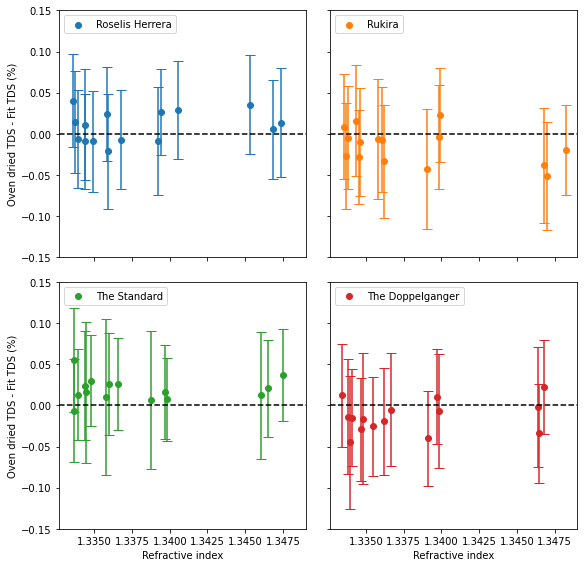

In [17]:
# Calculate symmetrical y-axis range
ylim = (-0.15, 0.15)

# Create the figure
fig, axs = plt.subplots(2, 2, figsize=(9,9))
fig.patch.set_facecolor('white')

# For each coffee
for i, coffee in enumerate(coffees):

    # Get axis and data for this coffee
    ax = axs[int(i/2)][i%2]
    df = filt[filt.coffee == coffee]

    # Plot the data
    xs = df.difluid_sample_n
    ys = df.res_tds
    ax.scatter(xs, ys, c=colors[i], label=coffee)

    # Plot error bars
    ax.errorbar(xs, ys, yerr=df.oven_tds_sigma * 1.960, c=colors[i], capsize=5, ls='none')

    # Plot the fit
    xs = np.array([xlim[0], xlim[1]])
    ys = np.array([0, 0])
    ax.plot(xs, ys, c='k', ls='--')

    # Set axis labels
    if int(i / 2) == 1:
        ax.set_xlabel('Refractive index')
    else:
        ax.set_xticklabels([])

    if int(i % 2) == 0:
        ax.set_ylabel('Oven dried TDS - Fit TDS (%)')
    else:
        ax.set_yticklabels([])

    # Set x-axis range
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Draw legend
    ax.legend(loc='upper left')

# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.1)